# Chapter 2

This workbook focuses on _insertion and merge sort_.  This is a sorting algorithm of asymptotic efficiency *O(n<sup>2</sup>)*.  For any element $j$ in set $A$, it inserts $A[j]$ to the left until it is larger than the previous value.  

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import time
import random
import sys 

%matplotlib inline


In [2]:
# Insertion-Sort Algorithm, ascending order
def ins_sort_asc(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j-1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A


In [3]:
# Example
unsorted = [3,2,5,6,4,7,8,1]

ins_sort_asc(unsorted)

[1, 2, 3, 4, 5, 6, 7, 8]

In [4]:
# Insertion-Sort Algorithm, descending order
def ins_sort_dec(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j-1
        while i >= 0 and A[i] < key:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A


In [5]:
ins_sort_dec(unsorted)

[8, 7, 6, 5, 4, 3, 2, 1]

In [6]:
# Problem 1-3
# Linear search
def lin_search(A, v):
    # A is list of values, v is key
    for j in range(0, len(A)):
        if A[j] == v:
            return j
    return None
            

In [7]:
# Example that should find value
assert(lin_search(unsorted, 4) == 4)

# Example that should not find value
assert(lin_search(unsorted, 9) == None)


In [9]:
# Here we will show that ins_sort_asc behaves with O(n^2)

iter = 10

l_length = 100

# Magnitudes of 10
steps = 20

sizes = []
for i in range(0, steps):
    sizes.append(l_length + i*100)

# Avg time list for each step
time_list = []
for i in sizes:
    times = []
    for j in range(0, iter):
        unsorted = np.random.randint(l_length, size = i)
        start = time.clock()
        ins_sort_asc(unsorted)
        lapse = time.clock() - start
        times.append(lapse)
    time_list.append(np.mean(times))
    print i
        


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [10]:
time_list

[0.0023381999999999349,
 0.0056555000000000797,
 0.011271600000000026,
 0.021356099999999944,
 0.035265899999999961,
 0.045581100000000062,
 0.061057200000000034,
 0.077698999999999963,
 0.10146530000000009,
 0.12563639999999995,
 0.15185010000000024,
 0.17810110000000012,
 0.23407459999999994,
 0.25546340000000017,
 0.27273839999999971,
 0.3286866,
 0.3635748999999997,
 0.40690049999999972,
 0.47652759999999894,
 0.47853049999999941]

In [11]:
df = pd.DataFrame({"Size": sizes, "Time": time_list})
df

,Size,Time
0,100,0.002338
1,200,0.005656
2,300,0.011272
3,400,0.021356
4,500,0.035266
5,600,0.045581
6,700,0.061057
7,800,0.077699
8,900,0.101465
9,1000,0.125636


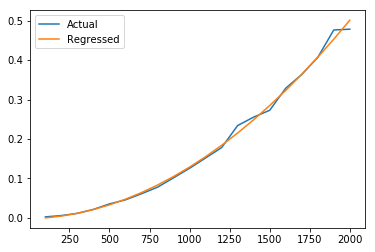

In [31]:
x = df.Size.tolist()
y = df.Time.tolist()

t = np.polyfit(x, y, 2)

def f(x):
    return t[0]*x**2 + t[1] * x + t[2]

z = []
for i in x:
    z.append(f(i))

plt.plot(x, y, label="Actual")
plt.plot(x, z, label="Regressed")
plt.legend()
plt.show()


In [43]:
# Problem 2-3: average linear search

times = []

for i in range(0, 1000):
    values = list(xrange(1,100))
    random.shuffle(values)
    start = time.clock()
    lin_search(values, 50)
    lapse = time.clock() - start
    times.append(lapse)

lindf = pd.DataFrame({"Time": times})
lindf = lindf*1000


[(0, 0.04)]

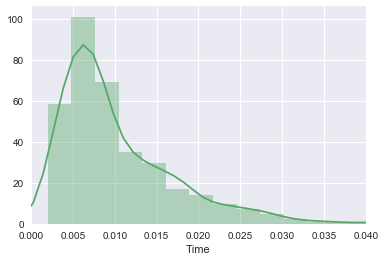

In [66]:
# Generate Geom(1/1000) data
z = np.random.geometric(p=1/1000, size=10000)
fig = sns.kdeplot(np.array(z), bw=0.5)
fig = sns.distplot(lindf.Time)
fig.set(xlim=[0, .04])


# Merge Sort Algorithm


In [10]:
# Merge - creates one sorted pile from two smaller sorted piles

def merge(A, p, q, r):
    n1 = q-p + 1
    n2 = r-q
    L, R = [], []
    for i in range(0,n1):
        L.append(A[p+i])
    for j in range(0, n2):
        R.append(A[q+ j + 1])
    L.append(sys.maxint)
    R.append(sys.maxint)
    i, j = 0, 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
    return A

# Test merge

print merge([1,2,3,4,5,2,3,3,4,7], 0, 4, 9)
    

[1, 2, 2, 3, 3, 3, 4, 4, 5, 7]


In [11]:
# Merge Sort with O(n lg(n))

def merge_sort(A, p, r):
    if p < r:
        q = int(np.floor((p+r)/2))
        merge_sort(A, p, q)
        merge_sort(A, q+1, r)
        merge(A, p, q, r)
    return A

In [10]:
# Testing
A = [1,2,3,4,5]
assert(merge_sort(A, 0, len(A)-1) == A)
B = [4,2,6,4,3,5,1,2,1,5,7]
B_sorted = [1,1,2,2,3,4,4,5,5,6,7]
assert(merge_sort(B, 0, len(B)-1) == B_sorted)

merge_sort(B, 0, len(B)-1)

[1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 7]

In [11]:
# Compare merge sort time to insert sort

np.random.seed(seed=123456789)

start1 = time.clock()
ins_sort_asc(np.random.randint(100, size=10000))
lapse1 = time.clock()-start1

start2 = time.clock()
merge_sort(np.random.randint(100, size=10000), 0, 10000-1)
lapse2 = time.clock() - start2

# Difference of about 15 seconds, or almost 100-fold improvement
print lapse1, lapse2


15.561616 0.149168


In [12]:
# Problem 3-2: Merge without sentinel values
def new_merge(A, p, q, r):
    n1 = q-p + 1
    n2 = r-q
    L, R = [], []
    for i in range(0,n1):
        L.append(A[p+i])
    for j in range(0, n2):
        R.append(A[q+ j + 1])
    i, j = 0, 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            if i == len(L) - 1:
                # A = A + R[j+1:len(R)]
                return A
            else:
                i += 1
        else:
            A[k] = R[j]
            if j == len(R) - 1:
                # A = A+L[i+1:len(L)]
                return A
            else:
                j += 1

In [13]:
new_merge([1,2,3,4,1,2,3,4,5,7], 0, 3, 9)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 7]

In [14]:

def new_merge_sort(A, p, r):
    if p < r:
        q = int(np.floor((p+r)/2))
        new_merge_sort(A, p, q)
        new_merge_sort(A, q+1, r)
        new_merge(A, p, q, r)
    return A

In [62]:
# Compare new merge sort with old
np.random.seed(seed=1212121)

start1 = time.clock()
merge_sort(np.random.randint(100, size=1000000), 0, 1000000-1)
lapse1 = time.clock() - start1

start2 = time.clock()
new_merge_sort(np.random.randint(100, size=1000000), 0, 1000000-1)
lapse2 = time.clock() - start2

print lapse1, lapse2

18.717856 18.617925


In [63]:
print "Percent improvement is: {}%".format(abs(lapse1 - lapse2)/lapse1*100)

Percent improvement is: 0.533880589743%


In [15]:
# Problem 3-4
# Recursive insertion sort
def rec_ins_sort(A, i):
    if i < len(A):
        j = i - 1
        key = A[i]
        while j >= 0 and A[j] > key:
            A[j+1] = A[j]
            j = j-1
        A[j+1] = key
        return rec_ins_sort(A, i+1)
    else:
        return A
        
# This has a run time of   
# T(n) = c + T(n-1) => O(n^2)
    

In [16]:
print rec_ins_sort([1,2,3, 2, 2], 0)

[1, 2, 2, 2, 3]


In [25]:
# Compare times of rec_ins_sort with standard
np.random.seed(1234321)

start1 = time.clock()
ins_sort_asc(np.random.randint(100, size=200))
lapse1 = time.clock() - start1

start2 = time.clock()
rec_ins_sort(np.random.randint(100, size=200), 0)
lapse2 = time.clock() - start2

print lapse1, lapse2

0.012624 0.006244


In [29]:
print "rec_ins_sort is faster than ins_sort_asc by: {}%.".format(
    (lapse1 - lapse2)/lapse1*100)

rec_ins_sort is faster than ins_sort_asc by: 50.5386565272%.


In [16]:
# Problem 3-5
# Binary search algorithm with running time log(n)

def bin_search(A, v):
    # A is the list to search, v is value to search
    low, high = 0, len(A)-1
    while low <= high:
        mid = int(np.floor((low + high)/2))
        if A[mid] == v:
            return mid
        elif A[mid] < v:
            low = mid +1
        else:
            high = mid - 1
    return None
    
    
    
    
    
    


In [17]:
test = [1,2,3,4, 5,6,7,8]
print bin_search(test, 6)

5


To show that bin_search has $\Theta(\log n)$, we have the following recurrence (note that n here represents the distance p - q):
$$T(n) = \begin{cases} C_0, \quad \text{if } n = 0 \\ 2T(n/2) + D_0, \quad \text{if } n >= 1 \end{cases}.$$

As we can see from expanding the recurrence relation, this implies:

$$T(n) \Rightarrow 4T(n/4) + 2D_0 \Rightarrow 2C_0 \log(n) + \log(n)D_0 \Rightarrow \Theta(\log n).$$

In [18]:
def gen_sorted_list_val(n):
    # n: length of list
    ind = np.random.randint(n-1)
    return ind

In [32]:
# Visual confirmation:

# number of data points
n = 1000

# Create list of array sizes
sizes = []
for i in range(0, n):
    sizes.append(100 + i*100)

# Time bin_search
times = []

for i in range(0, n):
    avg_time = []
    for j in range(0,100):
        v = gen_sorted_list_val(sizes[i]-1)
        l = range(0, sizes[i])
        start = time.clock()
        bin_search(l, v)
        avg_time.append(time.clock() - start)
    times.append(np.mean(avg_time))
    
    # Show progress report
    c = float(i)/n * 100
    if int(c) % 25 == 0 and c % 5 == 0:
        print "{}% complete.".format(c)
print "100% complete."
    





0.0% complete.
25.0% complete.
50.0% complete.
75.0% complete.
100% complete.


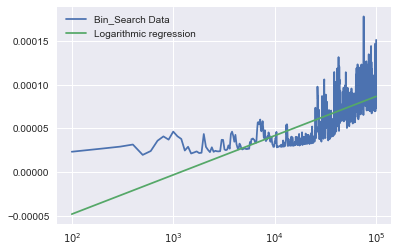

In [33]:
plt.semilogx(sizes, times, label="Bin_Search Data")

# Find regression for y = a + b log(x)
a, b = np.polyfit(np.log(sizes), times, 1)
plt.semilogx(sizes, a*np.log(sizes) + b, label="Logarithmic regression")

plt.legend()
plt.show()

We see that, as expected, bin_search appears to have a worst-case time complexity of $\Theta(\log n)$.

In [42]:
# Comparison of linear search with binary search for small list size n

# Number of data points
rep = 1000

# Create list of array sizes
sizes = []
for i in range(0, rep):
    sizes.append(1 + i)

# Create array of times
bin_times = []
lin_times = []

for i in range(0, rep):
    avg_time = []
    l = range(0, sizes[i])
    for j in range(0, 1000):
        v = gen_sorted_list_val(sizes[i]+1)
        start = time.clock()
        lin_search(l, v)
        avg_time.append(time.clock()-start)
    lin_times.append(np.mean(avg_time))
    avg_time = []
    for j in range(0, 1000):
        v = gen_sorted_list_val(sizes[i]+1)
        start = time.clock()
        bin_search(l, v)
        avg_time.append(time.clock()-start)
    bin_times.append(np.mean(avg_time))
    
    # Show progress report
    c = float(i)/n * 100
    if int(c) % 25 == 0 and c % 5 == 0:
        print "{}% complete.".format(c)
print "100% complete."


0.0% complete.
25.0% complete.
50.0% complete.
75.0% complete.
100% complete.


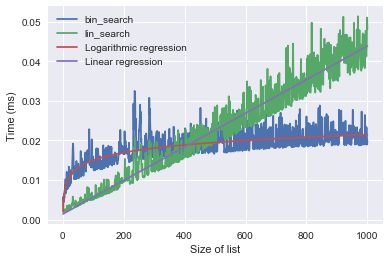

In [49]:
plt.plot(sizes, map(lambda x: 1000*x, bin_times), label="bin_search")
plt.plot(sizes, map(lambda x: 1000*x, lin_times), label="lin_search")

a, b = np.polyfit(np.log(sizes), map(lambda x: 1000*x, bin_times), 1)
plt.plot(sizes, a*np.log(sizes) + b, label="Logarithmic regression")

c, d = np.polyfit(sizes, map(lambda x: 1000*x, lin_times), 1)
plt.plot(sizes, map(lambda x: c*x + d, sizes), label="Linear regression")
plt.xlabel("Size of list")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

What we see from this comparison is that for lists of size $n < 400$, we actually expect linear search algorithms to run faster than binary search algorithms!


In [19]:
# Problem 3-6
# Insertion sort with binary search, n log(n) worst-case run time?
# No, will still run with O(n^2) in long run 
def bin_find(A, v):
    # Takes list A and value v, 
    # returns index-1 where v >= preceding elements
    low, high = 0, len(A)-1
    while low < high and A[high] > v:
        mid = int(np.floor((low + high)/2))
        if A[mid] > v:
            high = mid
        elif A[mid] <= v:
            if A[mid + 1] >= v:
                return mid+1
            else:
                low = mid
    return high + 1

def bin_ins_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = bin_find(A[0:j], key)
        k = j-1
        while k >= i and A[k] > key:
            A[k+1] = A[k]
            k -= 1
        A[k+1] = key

    return A

In [87]:
bin_ins_sort([1,3,2,4, 5, 6, 3, 3, 9])

[1, 2, 3, 3, 3, 4, 5, 6, 9]

In [89]:
# Compare bin_ins_sort with ins_sort_asc

# Number of data points
rep = 1000

# Create list of array sizes
sizes = []
for i in range(0, rep):
    sizes.append(1 + i)

# Create array of times
ins_times = []
bin_ins_times = []

for i in range(0, rep):
    l = range(0, sizes[i])
    start = time.clock()
    ins_sort_asc(l)
    ins_times.append(time.clock()-start)
    start = time.clock()
    bin_ins_sort(l)
    bin_ins_times.append(time.clock()-start)

    # Show progress report
    c = float(i)/n * 100
    if int(c) % 25 == 0 and c % 5 == 0:
        print "{}% complete.".format(c)
print "100% complete."

0.0% complete.
25.0% complete.
50.0% complete.
75.0% complete.
100% complete.


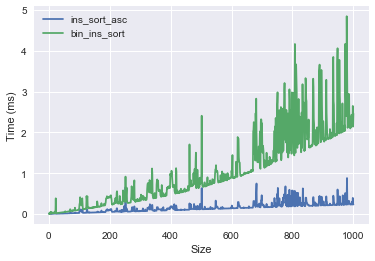

In [90]:
plt.plot(sizes, map(lambda x: 1000*x, ins_times), label="ins_sort_asc")
plt.plot(sizes, map(lambda x: 1000*x, bin_ins_times), label="bin_ins_sort")
plt.ylabel("Time (ms)")
plt.xlabel("Size")

plt.legend()
plt.show()

We can see that the binary insert sort actually is much slower than regular insert sort, probably due to the extra while loop in binary search.  It will not improve the worst-case running time of insertion sort to $\Theta(n \log(n))$.  

### Problem 3-7
 Write a $\Theta(n \log(n))$ algorithm that determines if set $S$ of $n$ elements 
 has two elements that add up to $v$.
 
 Steps:
 1. Sort list from lowest value to highest ($\Theta(n\log(n))$ with merge-sort
 2. For values $x_1$ less than $\frac{v}{2}$, binary search for value $v - x_1$ ($\log(n)$ with binary search)
     - Together, this step is of complexity ($n\log(n)$) since it linearly walks through portion of list, performing 
     operations each time of complexity $\log(n)$.
 3. If value exists, return pair of values and respective indices, else return None



In [20]:
# implementation

def add_to(S, v):
    # S is the set of integers, v is integer for 2 ints to sum to
    # First, sort list (n log(n))
    S = merge_sort(S, 0, len(S) - 1)
    
    # Second, check if summation exists
    i = 0
    while S[i] < int(float(v)/2 + 2) and i < len(S) - 2:
        res = bin_search(S, v - S[i])
        if res == None:
            i += 1
        elif res == i:
            if S[i+1] == S[i]:
                return S[i], S[i+1]
            else:
                return None
        else:
            return S[i], S[res]
    return None
    

In [161]:
# Test implementation
L1 = [1,3,5,2,5, 6]

assert(add_to(L1, 1) == None)
assert(add_to(L1, 5) == (2,3))
assert(add_to(L1, 10) == (5,5))
assert(add_to(L1, 11) == (5,6))
assert(add_to(L1, 12) == None)

In [206]:
# Time implementation

# Number of data points
rep = 1000

# Create list of array sizes
sizes = []
for i in range(0, rep):
    sizes.append(1 + i)

# Create array of times
add_to_times = []

for i in tqdm.trange(rep):
    avg_times = []
    for j in range(0, 10):
        l = np.random.randint(sizes[i], size = sizes[i])
        v = np.random.randint(2*sizes[i])
        start = time.clock()
        add_to(l, v)
        avg_times.append(time.clock()-start)
    add_to_times.append(np.mean(avg_times))


100%|██████████| 1000/1000 [01:40<00:00,  4.98it/s]


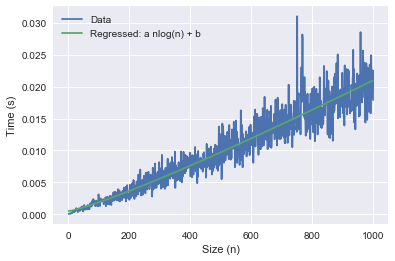

In [207]:
plt.plot(sizes, add_to_times, label="Data")

a, b = np.polyfit(np.log(sizes)*sizes, add_to_times, 1)
plt.plot(sizes, map(lambda x: a*np.log(x)*x + b, sizes), label="Regressed: a nlog(n) + b".format(a, b))
plt.xlabel("Size (n)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

# As we can see visually from the below plot, this algorithm seems to behave with worst case complexity n log(n)

In [204]:
# Extrapolating even further, but with fewer data points

# Number of data points
rep = 20

# Create list of array sizes
sizes = []
for i in range(0, rep):
    sizes.append(1 + i*1000)

# Create array of times
add_to_times = []

for i in tqdm.trange(rep):
    avg_times = []
    for j in range(0, 5):
        l = np.random.randint(sizes[i], size = sizes[i])
        v = np.random.randint(2*sizes[i])
        start = time.clock()
        add_to(l, v)
        avg_times.append(time.clock()-start)
    add_to_times.append(np.mean(avg_times))
#         # Show progress report
#         c = float(i)/rep * 100
#         if int(c) % 10 == 0 and c % 5 == 0:
#             print "{}% complete.".format(c)
#     print "100% complete."


100%|██████████| 20/20 [00:23<00:00,  2.03s/it]


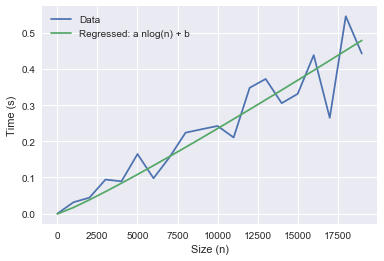

In [205]:
plt.plot(sizes, add_to_times, label="Data")

c, d = np.polyfit(np.log(sizes)*sizes, add_to_times, 1)
plt.plot(sizes, map(lambda x: a*np.log(x)*x + b, sizes), label="Regressed: a nlog(n) + b".format(a, b))
plt.xlabel("Size (n)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

# Problems for Chapter 2
1. a. Each linear sort for a list of length $k$ will have a worst-case run time of $\Theta(k^2)$.  Because there will be $n/k$ lists, the total worst-case run time will be $\Theta(k^2\frac{n}{k}) = \Theta(nk).$ 

   b. Now, we show how to merge the sublists with time complexity $\Theta(n\log(\frac{n}{k}))$.  We have that the recursive relationship is as follows:
   $$T(n) = \begin{cases} k \ \text{if } n = k \\ 2T(n/2) + D_0 \ \text{if } n > k \end{cases}. $$
      Thus, since we know that there will be $\log(\frac{n}{k})$ divisions until each subset is of size $k$, and there will be $\frac{n}{k}$ subsets, then this recurrence relations reduces to 
      $$T(n) = k\log(\frac{n}{k})\frac{n}{k} + \log(\frac{n}{k})D_0 \Rightarrow \Theta(n \log(\frac{n}{k})). $$
      
   c. Since the overall run time of this modified merge sort is $\Theta(nk + n\log(\frac{n}{k}))$, the largest value of $k$ that gives the same time complexity of merge sort is as follows.  We differentiate with respect to $n$ to optimize $k$ first.  If this optimal value is less than or equal to the complexity of merge-sort, then we have found a valid $k$.  We get $k - \frac{n}{k} = 0 \Rightarrow k = \sqrt{n}$ is the optimal $k$.  Now, this has a worst case time of $\Theta(n^{\frac{3}{2}})$ which is worse than merge sort.  Thus, there is no $k$, without utilizing constants, that will improve upon the merge-sort in the long run.  
   
   d. In practice, one would have to empirically test the coarsened problem on samples to determine the optimal $k$. 
   
2. a. The steps to proving an algorithm is correct via loops is the following: initialization, maintenance, and termination.  We need to also prove that the algorithm is correct when it initializes, and that it is maintained throughout the execution of the algorithm.  

   b. One loop invariant for lines 2-4 is that the smallest element in the array A[j:n] will always result at index $i$.  The initialization step holds.  This is because the loop initializes with $j$ being $A.length$, so the loop analyzes just one element $A[n]$.  This one element is, clearly, the smallest element in that array.  Now, the maintenance step holds as well, for by induction, assume that this invariance holds for $j = k$.  Then, for $j = k-1$, if $A[k] < A[k-1]$, then this means the smallest element in A[k-1:n] will be exchanged to A[k-1], satisfying the invariant.  Else, if $A[k] > A[k-1]$, then this means $A[k-1]$ is already the smallest element, since $A[k]$ is the smallest element of A[k:n] by assumption.  Thus, this induction holds.  
   
   c. Now, the loop invariant for lines 1-4 is that for array A[1:i], A[1] < A[2] < ... < A[i].  The initialization step holds: if $i=1$, then part b, employing the termination step, implies that the smallest element in $A$ is in place $A[1]$, and thus the initialization step holds.  Next, using induction, assume $A[1] < A[2] < \cdots < A[k]$ when $i = k$.  Then, for $i = k+1$, we have that the value of $A[k+1]$ must be greater than the previous values, otherwise part b implies that it would have been found at a lower index $i$.  Thus, $A[k] < A[k+1]$.  From induction, we have that this loop terminates with $A[1] < \cdots < A[A.length]$.  
   
   d. The worst case run time is $\Theta(n^2),$ since we are summing $\sum_{i=1}^n i$ to perform $i$ swaps for each value of $i$ in the outer for loop.  

## Problem 3: Correctness of Horner's Rule
Horner's Rule: For evaluating a polynomial 
$$P(x) = \sum_{k=0}^n a_k x^k = a_0 + x(a_1 + \cdots + x(a_{n-1} + xa_n)\cdots). $$
To evaluate $P(x)$, use the following algorithm:

1. y = 0
2. for $i=n$ downto 0
3. $y = a_i + x \cdot y$


### Question a
The running time for the above code fragment is $\Theta(n)$ as it linearly loops through all coefficients.  

### Question b
See code below.

In [25]:
# Horner's Method
def horners(x, P):
    # x is value of polynomial, P contains coefficients starting with a_n ending with a_0
    y = 0
    for i in range(0,len(P)):
        j = len(P) - i - 1
        y = P[j] + x*y
    return y


In [27]:
def poly_eval(x, P):
    y = 0
    for i in range(0, len(P)):
        j = len(P) - i - 1
        y = y + P[j]*x**j
    return y

In [28]:
# Test Horner's method and poly_eval

# P = 3x^2 - 2x + 1
P = [3, -2, 1]
horners(1, P) == poly_eval(1, P)




True

In [29]:
# Time both functions

rep = 1000

sizes = []
for i in range(0, rep):
    sizes.append(1 + i)

polys = []
for i in range(0,rep):
    polys.append(np.random.randint(10, size=sizes[i]))

horn_times = []
poly_times = []

for i in tqdm.trange(rep):
    start = time.clock()
    horners(.5, polys[i])
    horn_times.append(time.clock()-start)
    start = time.clock()
    poly_eval(.5, polys[i])
    poly_times.append(time.clock()-start)
    

100%|██████████| 1000/1000 [00:02<00:00, 340.96it/s]


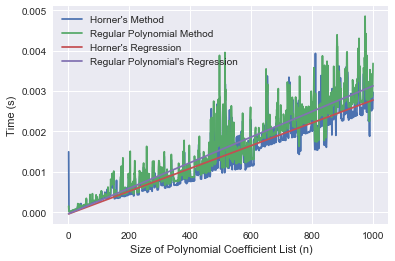

ah = 2.81956136956e-06, bh = -4.23534654655e-05, ap = 3.16543091143e-06, bp = -3.75851711712e-05


In [32]:
plt.plot(sizes, horn_times, label="Horner's Method")
plt.plot(sizes, poly_times, label="Regular Polynomial Method")

# Generate Regression Lines
ah, bh = np.polyfit(sizes, horn_times, 1)
ap, bp = np.polyfit(sizes, poly_times, 1)

plt.plot(sizes, map(lambda x: ah*x + bh, sizes), label="Horner's Regression")
plt.plot(sizes, map(lambda x: ap*x + bp, sizes), label="Regular Polynomial's Regression")

plt.xlabel("Size of Polynomial Coefficient List (n)")
plt.ylabel("Time (s)")

plt.legend()
plt.show()
print "ah = {}, bh = {}, ap = {}, bp = {}".format(ah, bh, ap, bp)

 We see that Horner's rule is slightly faster than the regular polynomial regression.  
 This is likely due to the added processing time for exponentiating x by k in each term, 
 where in Horner's method, each loop involves just multiplication of linear terms.


## Question c
One invariant for the for loop above is that $y = \sum_{k=0}^{n-(i+1)} a_{k+i+1}x^k$.  This is initialy true as $i = n \Rightarrow 0$ which is necessary since $y = 0$ before the loop starts.  Next, assume that the above invariant holds for $i = w$.  Then $y = \sum_{k=0}^{n - w - 1} a_{k+w + 1}x^k$.  Now, the next value in the loop is when $i = w-1$ which gives $y = a_{w-1} + x(\sum_{k=0}^{n - w - 1} a_{k+w + 1}x^k) = a_{w} + \sum_{k=0}^{n-w-1} a_{k+w+1}x^{k+1}$
which can equal $a_{w} + \sum_{k=1}^{n-w} a_{k+w}x^k$ by shifting the index.  This then goes to $\sum_{k=0}^{n-w} a_{k+w}x^k$ as expected. Therefore, this invariant is maintained throughout the loop.  It will then terminate with $y = \sum_{k=0}^n a_k x^k$.  

# Problem 2-4 Inversions
Let $A[1\ldots n]$ be an array of $n$ distinct numbers.  If $i < j$ and $A[i] > A[j]$, then the pair $(i, j)$ is an inversion of $A$.  

## Problem a
The five inversions of $(2, 3, 8, 6, 1)$ are $(1,5), (2,5), (3, 5), (4, 5), (3, 4)$.

## Problem b
The array with elements from the set $\{1, 2, \ldots, n \}$ has the most inversions when the list is sorted in descending order - that way, every pair $(i, j)$ is an inversion.  Thus, the most inversions possible is ${n \choose 2}.$